# 5.오차역전파법(backpropagation)


 - 가중치 매개변수에 대한 손실함수의 기울기를 수치미분을 사용하여 구했다.
 - 가중치 매개변수의 기울기를 효율적으로 계산하는 backpropagation을 알아본다.

## 1. 계산 그래프 (Computational Graph)

*   계산 과정을 그래프로 나타낸 것
*   노드 안에 연산 내용, 화살표 위에 계산 결과 작성
 - 계산 결과가 왼쪽에서 오른쪽으로 전해지게 한다(backward propagation, 역전파)





- 계산그래프에서는 국소적 계산을 전파하여 최종 결과를 얻는다.
 - 각 노드들은 자신과 관련한 계산 이외에는 신경쓰지 않는다.


- 중간 계산 결과를 모두 보관 가능하다.
 - 그 결과를 전달함으로써 전체를 구성하는 복잡한 계산이 가능하도록 한다.


- 역전파를 통하여 미분을 효율적으로 계산이 가능하다.

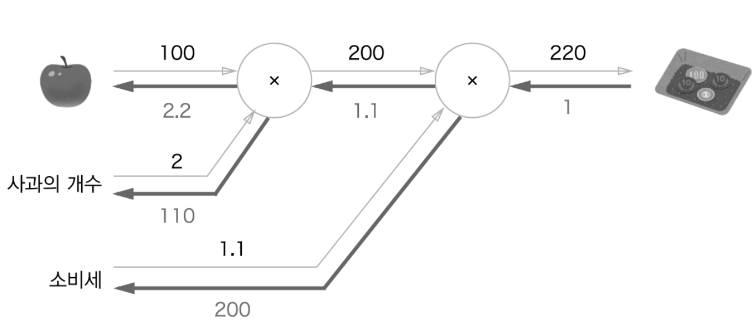

- 역전파는 순전파와 반대 방향의 화살표로 그린다.
 - 국소적 미분을 전파, 그 미분 값은 화살표의 아래에 적는다.
- 사과 가격에 대한 지불 금액의 미분 = 2.2
- 소비세에 대한 지불 금액의 미분 = 200
- 사과 개수에 대한 지불 금액의 미분 = 110
 - 중간까지 구한 미분 결과를 공유할 수 있기 때문에 다수의 미분을 효율적으로 계산할 수 있다.

## 2. 연쇄법칙 (chain rule)
- 국소적 미분을 전달하는 원리 = 연쇄법칙 (chain rule)

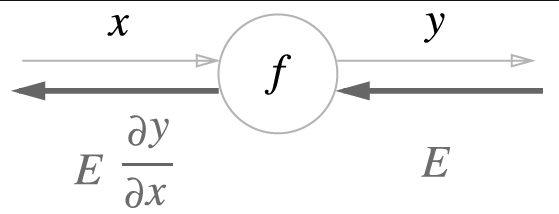

### 역전파의 계산 절차
 - 상류에서 전달된 값 (E)에 노드의 국소적 미분(dy/dx) 계산의 미분을 곱한 후 다음 앞쪽 노드로 전달한다.

- **연쇄법칙(chain rule)은 "합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다"는 성질**

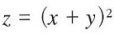

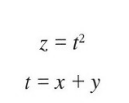

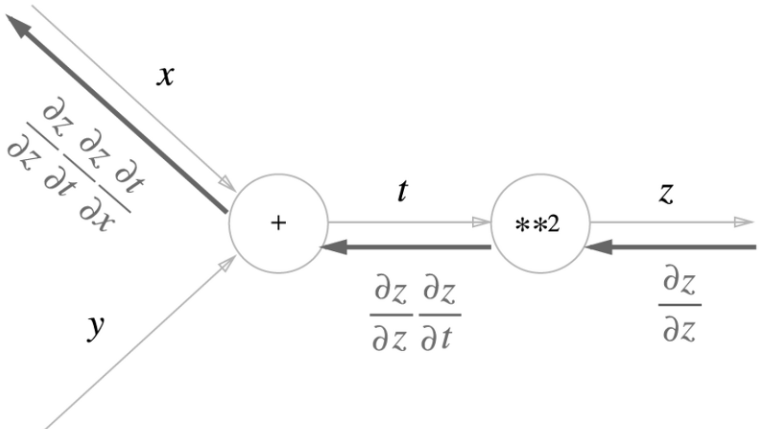

- 역전파 예시
 - 입력 dz/dz
 - 국소적 미분 dz/dt 곱합 = local gradient (dz/dz)(dz/dt) / 다음 노드로 넘김
 - dz/dx = (dz/dz)(dz/dt)(dt/dx) , 즉 x에 대한 z의 미분

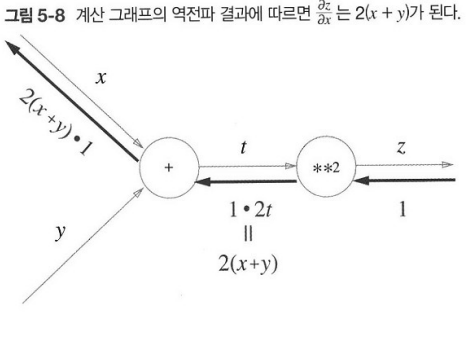

## 3. 역전파
 - z = x + y를 대상으로 덧셈 노드의 역전파를 살펴본다.
 - dz/dx = 1, dz/dy = 1
 - 상류에서 전해진 미분에 1을 곱하여 하류로 흘려보낸다.<br>
 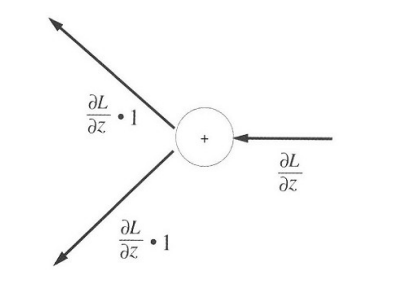

### **덧셈 노드의 역전파는 입력된 값을 그대로 다음 노드로 보낸다.**

- z = xy를 대상으로 곱셈 노드의 역전파를 살펴본다.
- dz/dx = y. dz/dy = x <br>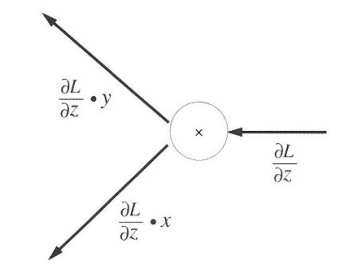


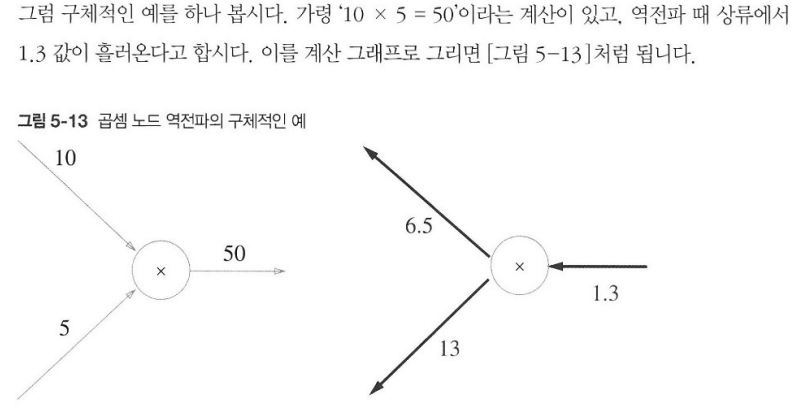

### **곱셈 노드의 역전파는 상류의 값에 순전파 때의 입력 신호들을 서로 바꾼 값을 곱하여 하류로 보낸다.**

- 위에서 봤던 사과예제에 대하여 다시 생각해보자.<br>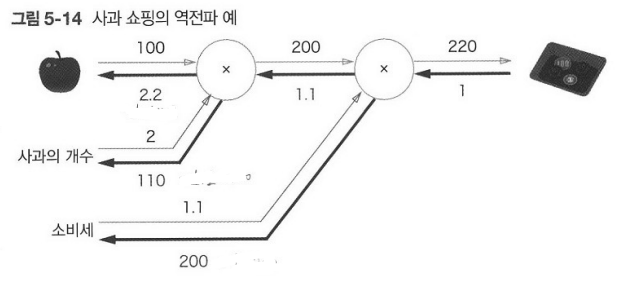


## 4. 단순한 계층 구현하기
- 위에서 그린 Computational Graph를 기반으로 구현해본다
- 곱셉 노드 : MulLayer, 덧셈 노드 : AddLayer
- 계층 각각을 하나의 클래스로 구현한다. (기능단위)
 - 시그모이드 함수 - Sigmoid, 행렬 곱 - Affine 등

- 곱셈 계층

In [5]:
class MulLayer:
  def __init__(self):  #인스턴스 변수 x,y / 순전파 시 입력 값을 유지하기 위하여 사용
    self.x = None
    self.y = None

  def forward(self, x, y): #x,y 인수 받고 두 값을 곱하여 반환
    self.x = x
    self.y = y
    out = x * y

    return out

  def backward(self, dout): #상류에서 넘어온 미분에 순전파 때의 값을 서로 바꾸어서 곱한 후 하류로 흘린다.
    dx = dout * self.y    # x와 y를 바꾼다.
    dy = dout * self.x

    return dx, dy

In [6]:
apple = 100
apple_num = 2
tax = 1.1

# 계층
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num) #사과값층/ 사과값,사과개수
price = mul_tax_layer.forward(apple_price, tax) #총가격층(세금층)/ 사과값, 세금


# 역전파
dprice = 1 #apple_price의 미분값
dapple_price, dtax = mul_tax_layer.backward(dprice) #소비세gradient, 사과값 세금 backprop
dapple, dapple_num = mul_apple_layer.backward(dapple_price) #사과값gradient, 사과값 사과개수 backprop

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

220.00000000000003
price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


- 덧셈 계층

In [7]:
class AddLayer:
  def __init__(self): #덧셈 계층에서는 초기화 필요없다
    pass

  def forward(self, x, y): # 순전파, 두 인수 더해서 반환
    out = x + y
    return out

  def backward(self, dout): # 역전파, 상류에서 내려온 미분 그대로 하류로
    dx = dout * 1
    dy = dout * 1
    return dx, dy

- 덧셈 계층과 곱셈 계층을 사용하여 사과 2개와 귤 3개를 사는 예제 구현 <br>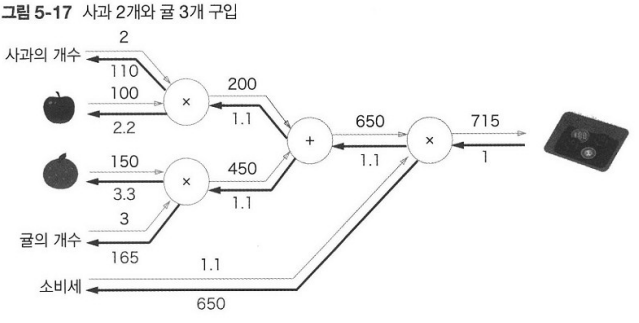

In [8]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


## 5. 활성화 함수 계층 구현하기
- 계산 그래프를 신경망에 적용시켜본다.
- ReLU, Sigmoid 계층을 구현해본다.

- ReLU 계층
 - 활성화 함수로 사용되는 ReLU의 수식<br>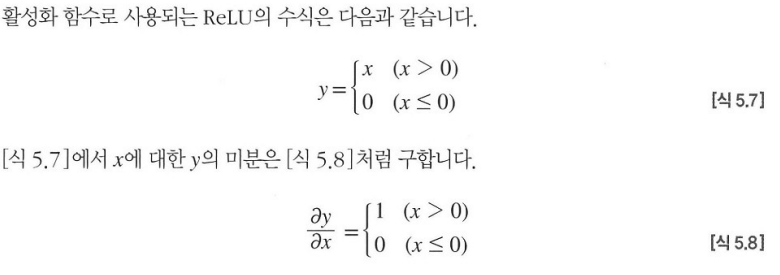

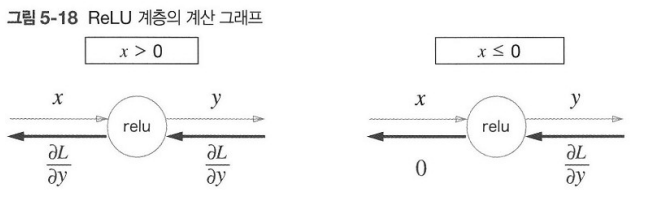

### **순전파 때의 입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘린다.반면, 순전파 때 x 가 0 이하라면 역전파 때는 하류로 신호를 보내지 않는다.**

In [9]:
class Relu:
  def __init__(self):
    self.mask = None #인스턴스 변수 mask, T/F로 구성된 넘파이 배열 / 순전파의 입력인 x의 원소 값이 0이하인 인덱스는 T, 그 외(0보다 큰 원소)는 F로 유지

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return dx

- 역전파 때는 순전파 때 만들어둔 mask를 써서 mask의 원소가 True인 곳에 상류에서 전파된 dout을 0으로 설정한다.

- Sigmoid 계층<br>
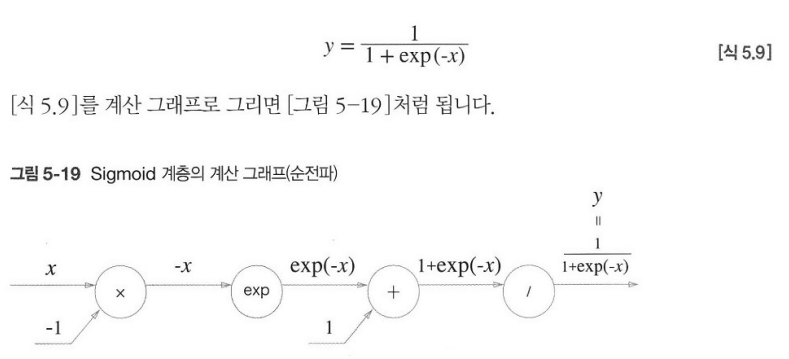

  1. / 노드
   - 역전파 때는 상류에서 흘러온 값에 -$y^2$(순전파의 출력을 제곱한 후 마이너스를 붙인 값)을 곱하여 하류로 전달.<br>
   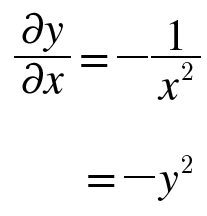

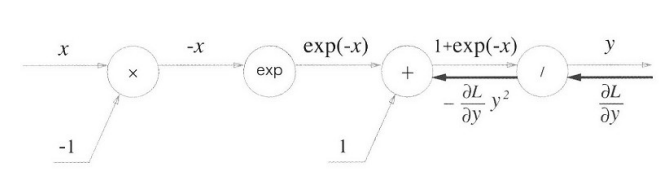

2. $+$ 노드
 - $+$ 노드는 상류의 값을 그대로 하류로 보낸다. <br>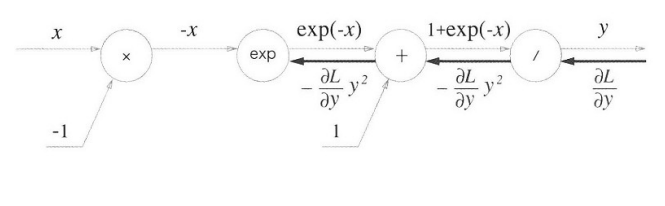

3. exp 노드
 - 계산 그래프에서는 상류의 값에 순전파 때의 출력을 곱하여 하류로 전파. 예에서는 exp(-1)<br>
 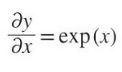

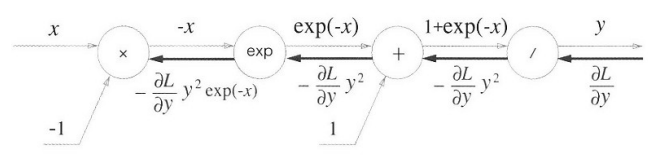

4. X 노드
 - 순전파 때의 값을 서로 바꾸어서 곱한다. 예에서는 -1 곱함

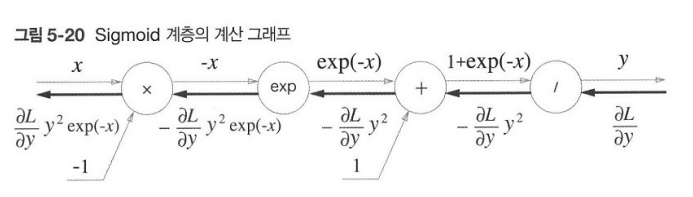

### 역전파의 최종 출력은 순전파의 입력x 와 출력 y 만으로 계산이 가능하다.
- 그래프의 중간 과정을 모두 묶어 sigmoid노드 하나로 대체할 수 있다.

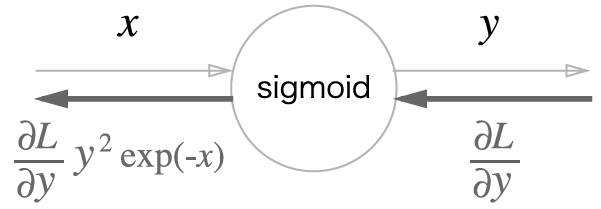

- 역전파 과정의 중간 계산들을 생략할 수 있어 더 효율적인 계산 가능.
- 노드를 그룹화하여 sigmoid 계층의 세세한 내용을 노출하지 않고 입,출력에만 집중할 수 있다.

- sigmoid 계층의 역전파 최종 출력<br>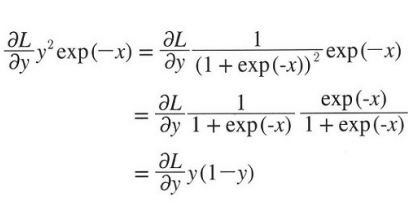

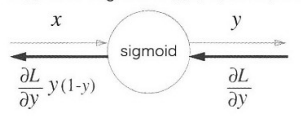

In [10]:
import numpy as np

In [11]:
class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out

    return dx

- Affine 계층
 - 가중치 신호의 총합을 계산하기 때문에 행렬의 곱 np.dot()을 사용했다.
 - Y = np.dot(X, W) + B
 - Y를 활성화 함수로 변환하여 다음 층으로 전파하는 것이 신경망 순전파의 흐름이다.
 - 신경망의 순전파 때 수행하는 행렬의 곱은 기하학에서 어파인 변환 (affine transdormation)이라 한다. <br>
 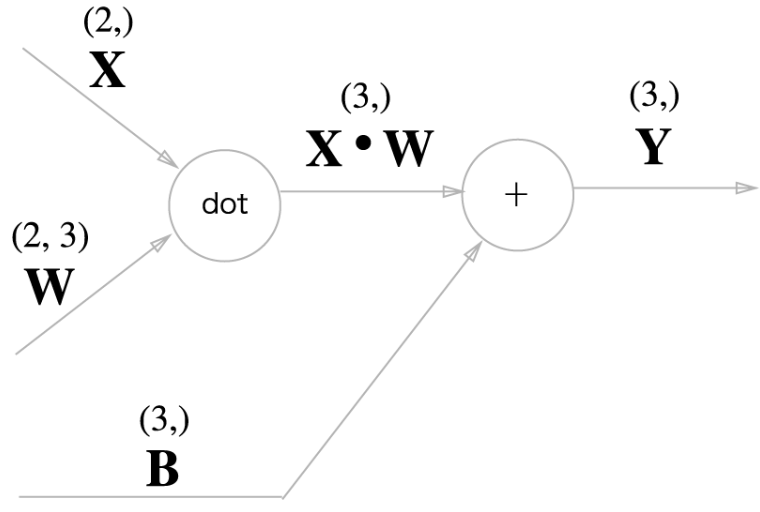

- 행렬을 사용한 역전파도 행렬의 원소마다 전개해보면 스칼라값을 사용했던 계산들과 같은 순서이다.
- X와 dL/dX는 같은 형상. W와 dL/dW도 같은 형상이다<br>
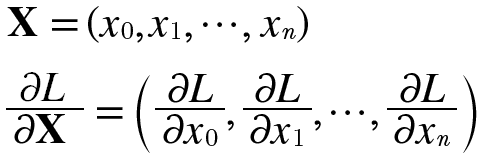

- 행렬 곱('dot'노드)의 역전파는 행렬의 대응하는 차원의 원소 수가 일치하도록 곱을 조립하여 구할 수 있다.<br>
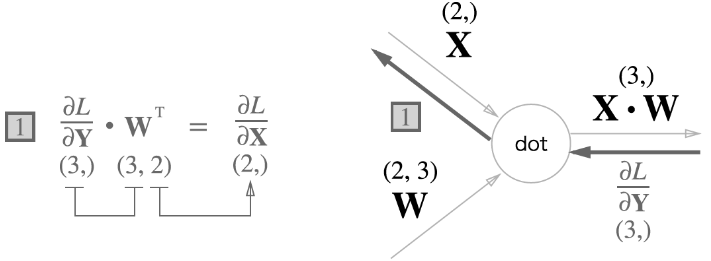


- Affin 계층의 역전파를 계산 그래프로 살펴본다. <br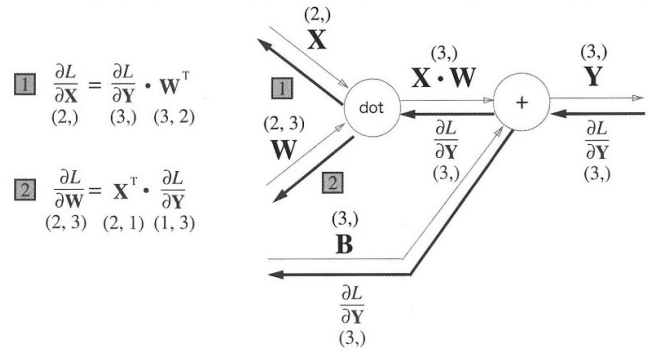>

In [13]:
x_dot_W = np.array([[0,0,0],[10,10,10]])
B = np.array([1,2,3])

x_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [14]:
x_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

- 배치용의 경우 input X의 형상이 (N, 2) 변화하는 형태이다.
- 역전파 때 각 데이터의 역전파 값이 편향의 원소에 모여야 한다.
- N = 2 ,편향의 역전파는 그 두 데이터에 대한 미분을 데이터마다 더해서 구한다.
 -

In [15]:
dY = np.array([[1,2,3],[4,5,6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
dB = np.sum(dY, axis=0)
dB

array([5, 7, 9])

np.sum에서 0번째 축 (데이터의 단위로 한 축)에 대해 총 합을 구하는 것
- axis = 0 , x축 기준  = row합
- axis = 1 , y축 기준  = col합
- axis = 2 , z축 기준  = depth합

In [17]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b

    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)

    return dx

- softmax-with-loss 계층
 - 출력층의 소프트맥스 함수 ( 입력값을 정규화하여 출력)
 - 교차함수인 CEE도 함께 구현<br>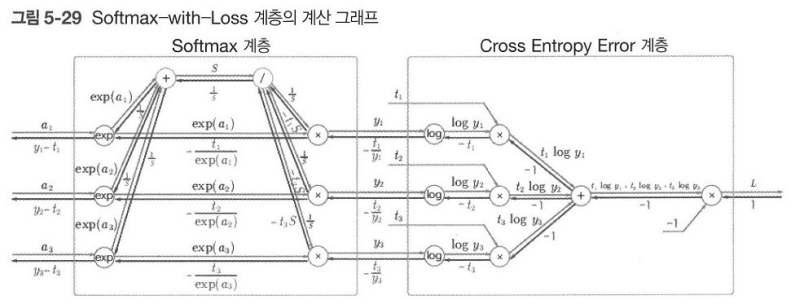


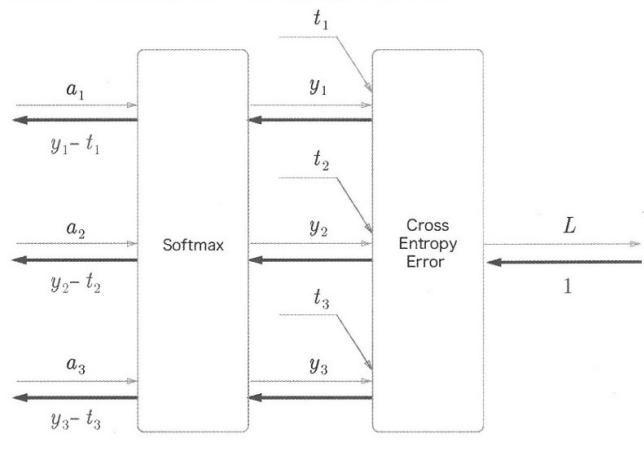

- 3클래스로 분류를 가정하고 이전 계층에서의 3개의 입력을 받는다.
- softmax 계층은 입력(a1, a2, a3)를 정규화하여 (y1. y2, y3) 를 출력한다
- CEE 계층은 Softmax 의 출력 (y1. y2, y3)와 정답 레이블 (t1, t2, t3)를 받고 이 데이터들로부터 손실L을 출력한다.

 - 역전파의 결과
  - softmax 계층의 역전파는 (y1-t1, y2-t2, t3-t3) = softmax출력과 정답 레이블의 차분
   - 신경망의 역전파에서는 오차(현재 출력과 정답 레이블의 오차)가 앞 계층에 전해진다.

- Softmax 함수의 손실 함수로 교차 엔트로피 오차를 사용하니 역전파가 (y₁ - t₁, y₂ - t₂, y₃ - t₃)로 말끔한 결과
 - 이는 교차 엔트로피 오차라는 함수가 그렇게 설계되었기 때문이다.
- 회귀의 출력층에서 사용하는 항등 함수의 손실 함수로 오차제곱합을 이용하는 이유도 이와 같다.
 - 즉, '항등 함수'의 손실 함수로 'MSE'을 사용하면 역전파의 결과가 (y₁ - t₁, y₂ - t₂, y₃ - t₃)로 말끔히 떨어진다.

In [29]:
import sys, os
sys.path.append(os.pardir)
from content.functions import *

class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None # 손실
    self.y = None    # Softmax의 출력
    self.t = None    # 정답 레이블

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size
    return dx

- 역전파 때 전파하는 값을 배치의 수로(batch_size)로 나누어서 데이터 1개당 오차를 앞 계층으로 전파한다.

## 7. 오차역전파법 구현
- 신경망 학습
 1. 미니배치 :훈련데이터 중 일부를 무작위로 가져옴
 2. **기울기 산출 : 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시**
 3. 매개변수 갱신 : 기울기 방향으로 갱신
 4. 1-3 반복

- 수치미분을 순전파로 시행하면 속도가 느리다. 이 연산을 역전파법을 이용하여 빠르게 구한다.

### 앞선 장에서의 구현과 공통되는 부분이 많다.
- 차이점
 - 계층을 사용한다. 즉 계층을 사용함으로써 인식 결과를 얻는 predict와 gradient계층의 전파만으로만 동작이 이루어진다는 점에 초점을 맞춘다.

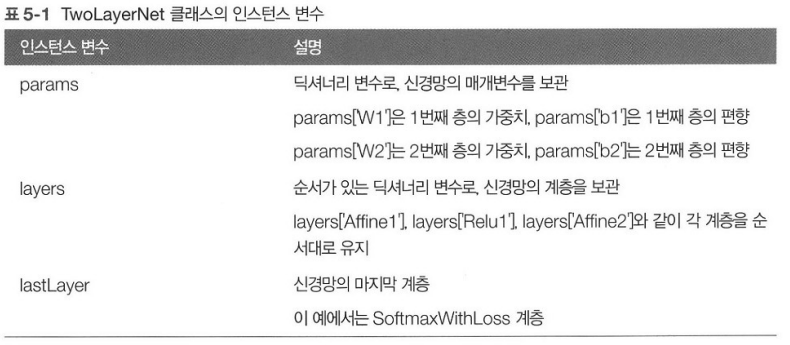

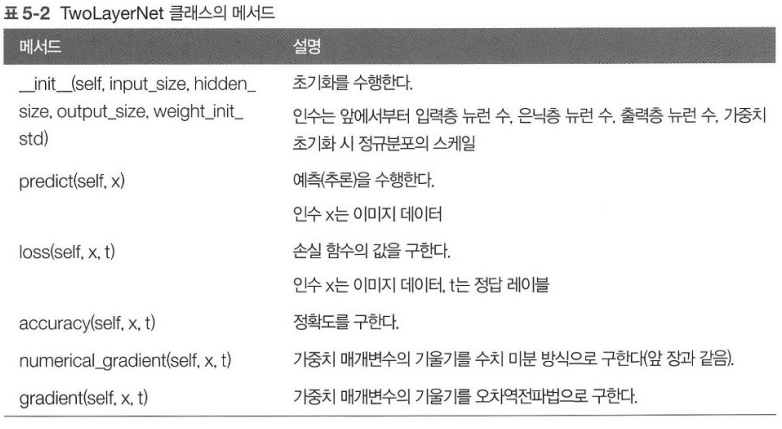

In [30]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from content.layers import *
from content.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        # 계층의 전파로 동작한다.

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        #역전파

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

- 신경망의 계층을  OrderedDict에 보관한다.
 - OrderedDict : 순서가 있는 딕셔너리 (추가한 순서를 기억한다.)

 - 순전파에서 추가한 순서대로 forward() 메서드 호출
 - 역전파에서 계층을 반대 순서로 호출

 - Affine , ReLU 계층이 각자 내부에서 순전파와 역전파를 처리하고 있다.
  - 계층을 올바른 순서로 연결한 다음 순서대로 (역순으로) 호출하면 된다.

> **계층을 모듈화 하여 얻는 이점**
> - **깊은 신경망을 만들고 싶다면 단순하게 필요한 만큼 계층을 추가하면 된다.**

- 각 계층 내부에서 구현된 순전파와 역전파를 이용하여 인식 처리와 학습에 필요한 기울기를 정확하게 구해본다.

- 기울기를 구하는 방법
 - 수치미분 (오차역전파법을 정확히 구현했는지 확인하는 작업을 위해 필요하다)
 - 해석적으로 수식을 풀어서 구한다
   - **오차역전파법을 사용. 매개변수가 많아도 효율적으로 계산이 가능하다.**


In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from content.mnist import load_mnist
from content.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

# b1:9.70418809871e-13
# W2:8041139039497e-13
# b2:101945999745e-10
# W1:2.2232446644e-13

**수치 미분과 오차역전파법으로 구한 기울기의 차이가 작다.**
 - 구현에 실수가 없다는 가능성이 커진다.

- 오차역전파법을 사용한 학습 구현하기
 - 기울기를 오차역전파법으로 구한다.

In [34]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
from content.mnist import load_mnist
from content.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식 40분~
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다) 53초

    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.11126666666666667 0.111
0.9023333333333333 0.9075
0.9206833333333333 0.92
0.9334166666666667 0.9314
0.9433333333333334 0.9414
0.9505333333333333 0.9478
0.9574666666666667 0.9548
0.96075 0.9569
0.9648166666666667 0.9606
0.96775 0.9618
0.9698666666666667 0.9646
0.9729 0.9661
0.9743666666666667 0.9655
0.9761666666666666 0.9685
0.9783166666666666 0.9694
0.9791333333333333 0.9712
0.9805666666666667 0.9701


## 8. 정리
- 계산 그래프(Computational Graph)를 이용하면 계산 과정을 시각적으로 판단할 수 있다.
- 계산 그래프의 노드는 국소적 계산으로 구성, 조합하여 전체 계산 구성 가능
- 계산 그래프의 역전파로 각 노드의 미분을 구할 수 있다.
- 신경망의 구성요소를 계층으로 구성하여 기울기를 효율적으로 계산할 수 있다. 이를 오차역전파법(backpropagation)라고 한다.
- 수치미분으로 나온 값과 오차역전파법의 결과를 비교하면 오차 역전파법의 구현에 잘못된 부분이 없는지 확인할 수 있다.(기울기 확인)